# ML PROJECT

<h2>Introduction:</h2>
<p>In this notebook, we are going to predict whether an individual is <b>healthy or diabetic</b>. First let's do exploratory data analysis on our dataset and learn what is the common trait of people who has diabetes and then let's create a model to predict whether an individual is <b>healthy or diabetic</b>.</p>
<p>We are going to use 
<blockquote>K Neighbors Classifier</blockquote>     
<blockquote>Logistic Regression</blockquote>     
<blockquote>Random Forest</blockquote>
</p>

<h4>Importing Libraries:</h4>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

<h4>Importing Dataset:</h4>

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h2>Exploratory Data Analysis</h2>

Let's see how many individuals are healthy and how many individuals are diabetic:

In [9]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

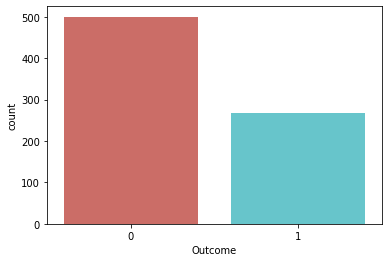

In [10]:
sns.countplot(x="Outcome", data=dataset, palette="hls")
plt.show()

In [11]:
countHealthy = len(dataset[dataset.Outcome == 0])
countDiabetic = len(dataset[dataset.Outcome == 1])
print("Percentage of Individuals Healthy: {:.2f}%".format((countHealthy / (len(dataset.Outcome))*100)))
print("Percentage of Individuals Diabetic: {:.2f}%".format((countDiabetic / (len(dataset.Outcome))*100)))

Percentage of Individuals Healthy: 65.10%
Percentage of Individuals Diabetic: 34.90%


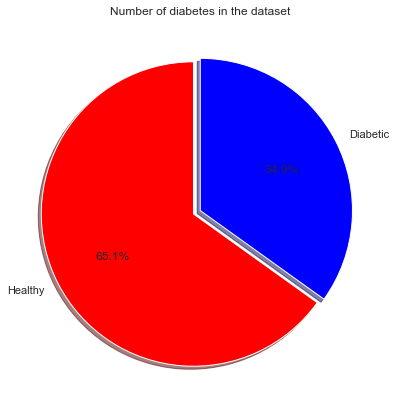

In [12]:
sns.set(style="whitegrid")
labels = ['Healthy', 'Diabetic']
sizes = dataset['Outcome'].value_counts(sort = True)

colors = ["red","blue"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of diabetes in the dataset')
plt.show()

<h4>Inference:</h4>
<p>More number of people are <b>healthy</b>.</p>
<p>Number of healthy people:Around 500</p>
<p>Number of diabetic people:Around 250-300</p>

<h4>Healthy vs Diabetic by Pregnancy</h4>

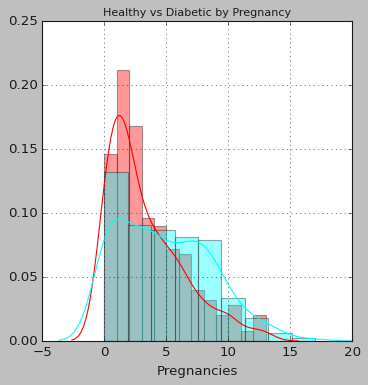

In [13]:
plt.style.use("classic")
plt.figure(figsize=(5,5))
sns.distplot(dataset[dataset['Outcome'] == 0]["Pregnancies"], color='red') # Healthy - Red
sns.distplot(dataset[dataset['Outcome'] == 1]["Pregnancies"], color='cyan') # Diabetic - Cyan
plt.title('Healthy vs Diabetic by Pregnancy', fontsize=10)
plt.xlim([-5,20])
plt.grid(linewidth = 0.5)
plt.show()

<h4>Inference:</h4>
<p>From above graph, we can say that the Pregnancy isn't likely cause for diabetes as the distribution between the Healthy and Diabetic is almost same.</p>

<h4>Healthy vs Diabetic by Glucose</h4>

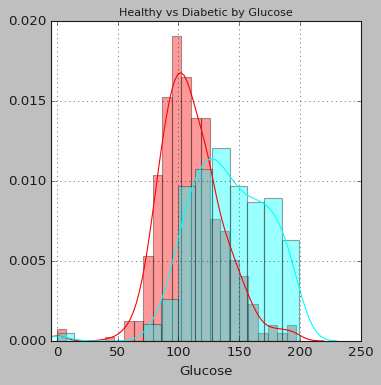

In [14]:
plt.style.use("classic")
plt.figure(figsize=(5,5))
sns.distplot(dataset[dataset['Outcome'] == 0]["Glucose"], color='red') # Healthy - Red
sns.distplot(dataset[dataset['Outcome'] == 1]["Glucose"], color='cyan') # Diabetic - Cyan
plt.title('Healthy vs Diabetic by Glucose', fontsize=10)
plt.xlim([-5,250])
plt.grid(linewidth = 0.5)
plt.show()

<h4>Inference:</h4>
<p>From above graph, we can see the the Healthy person are more around 120mg/dl but it then gradually drops, and for diabetic person it is vice versa.</p>

<h4>Healthy vs Diabetic by Blood Pressure </h4>

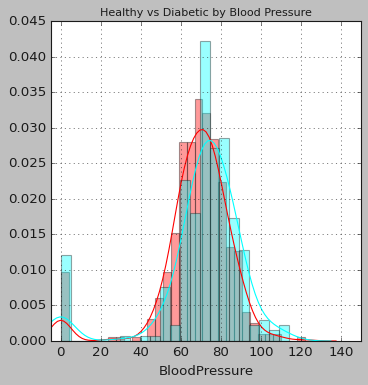

In [15]:
plt.style.use("classic")
plt.figure(figsize=(5,5))
sns.distplot(dataset[dataset['Outcome'] == 0]["BloodPressure"], color='red') # Healthy - Red
sns.distplot(dataset[dataset['Outcome'] == 1]["BloodPressure"], color='cyan') # Diabetic - Cyan
plt.title('Healthy vs Diabetic by Blood Pressure', fontsize=10)
plt.xlim([-5,150])
plt.grid(linewidth = 0.5)
plt.show()

<h4>Inference:</h4>
<p>From above graph, we can say that, diabetic and healthy people are evenly distributed with low and normal BP but, there are less healthy people who have high BP.</p>

<h4>Healthy vs Diabetic by Skin Thickness </h4>

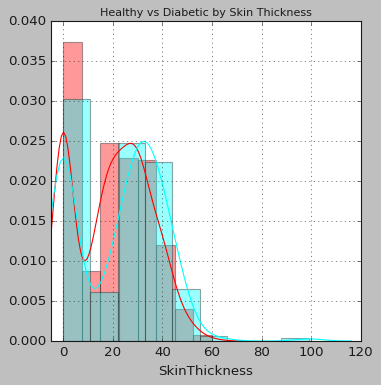

In [16]:
plt.style.use("classic")
plt.figure(figsize=(5,5))
sns.distplot(dataset[dataset['Outcome'] == 0]["SkinThickness"], color='red') # Healthy - Red
sns.distplot(dataset[dataset['Outcome'] == 1]["SkinThickness"], color='cyan') # Diabetic - Cyan
plt.title('Healthy vs Diabetic by Skin Thickness', fontsize=10)
plt.xlim([-5,120])
plt.grid(linewidth = 0.5)
plt.show()

<h4>Inference:</h4>
<p>From above graph, the distribution between healthy and diabetic people are around same for skin thickness.</p>

<h4>Healthy vs Diabetic by Insulin</h4>

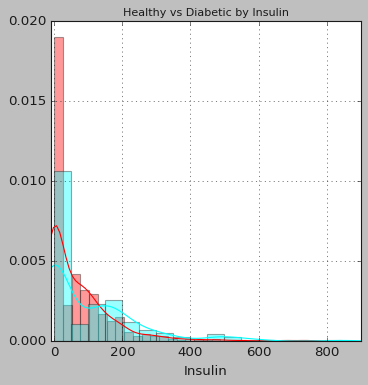

In [17]:
plt.style.use("classic")
plt.figure(figsize=(5,5))
sns.distplot(dataset[dataset['Outcome'] == 0]["Insulin"], color='red') # Healthy - Red
sns.distplot(dataset[dataset['Outcome'] == 1]["Insulin"], color='cyan') # Diabetic - Cyan
plt.title('Healthy vs Diabetic by Insulin', fontsize=10)
plt.xlim([-10,900])
plt.grid(linewidth = 0.5)
plt.show()

<h4>Inference:</h4>
<p>From above graph, we can see that there are diabetic people increase as the levels of insulin gradually increases. There are more healthy people around insulin levels 0-100.</p>

<h4>Healthy vs Diabetic by BMI </h4>

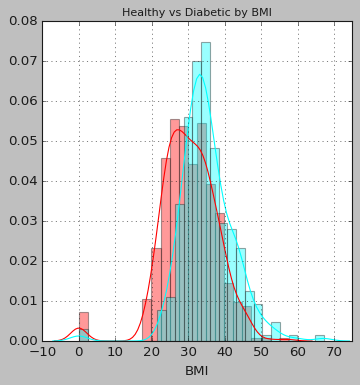

In [18]:
plt.style.use("classic")
plt.figure(figsize=(5,5))
sns.distplot(dataset[dataset['Outcome'] == 0]["BMI"], color='red') # Healthy - Red
sns.distplot(dataset[dataset['Outcome'] == 1]["BMI"], color='cyan') # Diabetic - Cyan
plt.title('Healthy vs Diabetic by BMI', fontsize=10)
plt.xlim([-10,75])
plt.grid(linewidth = 0.5)
plt.show()

<h4>Inference:</h4>
<p> From above graph we can determine that, as the BMI increases the person likely being healthy decreases and being diabetic increases.</p>

<h4>Healthy vs Diabetic by Diabetes Pedigree Function</h4>

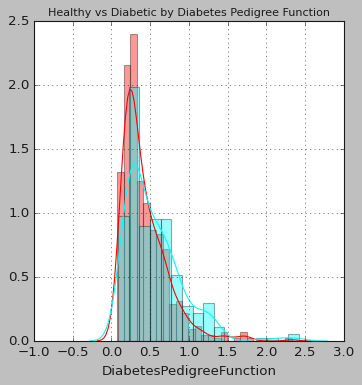

In [19]:
plt.style.use("classic")
plt.figure(figsize=(5,5))
sns.distplot(dataset[dataset['Outcome'] == 0]["DiabetesPedigreeFunction"], color='red') # Healthy - Red
sns.distplot(dataset[dataset['Outcome'] == 1]["DiabetesPedigreeFunction"], color='cyan') # Diabetic - Cyan
plt.title('Healthy vs Diabetic by Diabetes Pedigree Function', fontsize=10)
plt.xlim([-1,3])
plt.grid(linewidth = 0.5)
plt.show()

<h4>Inference</h4>
<p> From above graph, as the function increase the diabetic people increases, showing that the diabetes could be hereditary for that individual.</p>

<h4>Healthy vs Diabetic by Age</h4>

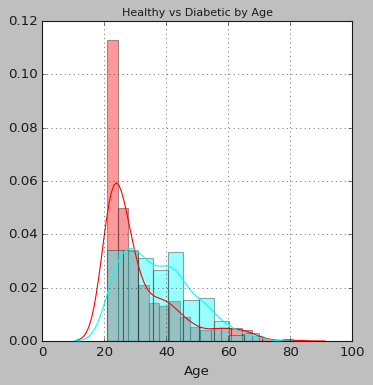

In [20]:
plt.style.use("classic")
plt.figure(figsize=(5,5))
sns.distplot(dataset[dataset['Outcome'] == 0]["Age"], color='red') # Healthy - Red
sns.distplot(dataset[dataset['Outcome'] == 1]["Age"], color='cyan') # Diabetic - Cyan
plt.title('Healthy vs Diabetic by Age', fontsize=10)
plt.xlim([0,100])
plt.grid(linewidth = 0.5)
plt.show()

<h4>Inference:</h4>
<p>From above graph, we can see that there are more healthy people around 20-25 age but as the age gradually increases so does the people being diabetic, this shows that age and diabetes go hand in hand.</p>

<h2>Feature Selection</h2>

<p><b>Feature selection</b> is the process of selecting a subset of relevant features for use in model construction.</p>
<p>Irrelevant or partially relevant features can negatively impact model performance.</p>
<p>So it's better to remove those features</p>
<p>From the above plots, it's clearly visibe that <b>Pregnancy,Skin Thickness,Diabetes Pedigree Function</b> create less impact over the <b>Outcome</b></p>
<p>So we consider the columns <b>Glucose,Blood Pressure,Insulin,BMI,Age</b> to train our model.</p>

# K Neighbors Classifier
KNN algorithm is one of the simplest classification algorithm and it is one of the most used learning algorithms.KNN Algorithm is based on feature similarity: How closely out-of-sample features resemble our training set determines how we classify a given data point.KNN can be used for classification — the output is a class membership (predicts a class — a discrete value).

In [ ]:
x=dataset[['Glucose','BloodPressure','Insulin','BMI','Age']]
y=dataset[['Outcome']]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [23]:
model=KNeighborsClassifier(n_neighbors=5)

In [24]:
model.fit(x_train,y_train.values.ravel())

KNeighborsClassifier()

In [25]:
pred=model.predict(x_test)

In [26]:
print(metrics.accuracy_score(y_test,pred))

0.765625


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       130
           1       0.65      0.58      0.62        62

    accuracy                           0.77       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.76      0.77      0.76       192



In [28]:
pred=model.predict([[148,72,0,33.6,50]]) 
val=pred[0]
val

1

<h4>Inference:</h4>
<p>From the above, we can see that an individual with</p>
<blockquote>Glucose level-148</blockquote>
<blockquote>Blood Pressure level-72</blockquote>
<blockquote>Insulin level-0</blockquote>
<blockquote>BMI-33.6</blockquote>
<blockquote>Age-50</blockquote>
<p>is <b>Diabetic</b></p>

In [29]:
pred=model.predict([[85,66,0,26.6,31]]) 
val=pred[0]
val

0

<h4>Inference:</h4>
<p>From the above, we can see that an individual with</p>
<blockquote>Glucose level-85</blockquote>
<blockquote>Blood Pressure level-66</blockquote>
<blockquote>Insulin level-0</blockquote>
<blockquote>BMI-26.6</blockquote>
<blockquote>Age-31</blockquote>
<p>is <b>Healthy</b></p>

# Logistic Regression
Logistic regression is one of the most common and useful classification algorithms in machine learning.Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.

In [30]:
model = LogisticRegression()

In [31]:
model.fit(x_train,y_train.values.ravel())

LogisticRegression()

In [32]:
pred = model.predict(x_test)

In [33]:
print(metrics.accuracy_score(y_test,pred))

0.7760416666666666


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       130
           1       0.69      0.56      0.62        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



In [35]:
pred=model.predict([[148,72,0,33.6,50]]) 
val=pred[0]
val

1

<h4>Inference:</h4>
<p>From the above, we can see that an individual with</p>
<blockquote>Glucose level-148</blockquote>
<blockquote>Blood Pressure level-72</blockquote>
<blockquote>Insulin level-0</blockquote>
<blockquote>BMI-33.6</blockquote>
<blockquote>Age-50</blockquote>
<p>is <b>Diabetic</b></p>

In [36]:
pred=model.predict([[85,66,0,26.6,31]]) 
val=pred[0]
val

0

<h4>Inference:</h4>
<p>From the above, we can see that an individual with</p>
<blockquote>Glucose level-85</blockquote>
<blockquote>Blood Pressure level-66</blockquote>
<blockquote>Insulin level-0</blockquote>
<blockquote>BMI-26.6</blockquote>
<blockquote>Age-31</blockquote>
<p>is <b>Healthy</b></p>

# Random Forest Classification
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in Machine Learning. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [37]:
model = RandomForestClassifier()

In [38]:
model.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [39]:
pred = model.predict(x_test)

In [40]:
print(metrics.accuracy_score(y_test,pred))

0.8125


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       130
           1       0.75      0.63      0.68        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.78       192
weighted avg       0.81      0.81      0.81       192



In [42]:
pred=model.predict([[148,72,0,33.6,50]]) 
val=pred[0]
val

1

<h4>Inference:</h4> 
<p>From the above, we can see that an individual with</p>
<blockquote>Glucose level-148</blockquote>
<blockquote>Blood Pressure level-72</blockquote>
<blockquote>Insulin level-0</blockquote>
<blockquote>BMI-33.6</blockquote>
<blockquote>Age-50</blockquote>
<p>is <b>Diabetic</b></p>

In [43]:
pred=model.predict([[85,66,0,26.6,31]]) 
val=pred[0]
val

0

<h4>Inference:</h4>
<p>From the above, we can see that an individual with</p>
<blockquote>Glucose level-85</blockquote>
<blockquote>Blood Pressure level-66</blockquote>
<blockquote>Insulin level-0</blockquote>
<blockquote>BMI-26.6</blockquote>
<blockquote>Age-31</blockquote>
<p>is <b>Healthy</b></p>

<h2>Conclusion</h2>

<p>We have used three algorithms:
<blockquote>K Neighbors Classifier-Accuracy:77%</blockquote>     
<blockquote>Logistic Regression-Accuracy:78%</blockquote>     
<blockquote>Random Forest-Accuracy:81%</blockquote>
</p>

The accuracy level is greater when compared to other algorithms. The proposed model gives the best results for diabetic prediction and the result showed that the prediction system is capable of predicting the diabetes disease effectively, efficiently and instantly.

# Reasons for selecting the particular algorithms and the selected parameters

# Feature selection

Feature selection is the process of selecting a subset of relevant features for use in model construction.

Irrelevant or partially relevant features can negatively impact model performance.

So it's better to remove those features

From the plots plotted in Exploratory data analysis, it's clearly visibe that Pregnancy,Skin Thickness,Diabetes Pedigree Function create less impact over the Outcome

So we consider the columns Glucose,Blood Pressure,Insulin,BMI,Age to train our model.

# K Neighbors Classifier

KNN algorithm is one of the simplest classification algorithm and it is one of the most used learning algorithms. KNN Algorithm is based on feature similarity: How closely out-of-sample features resemble our training set determines how we classify a given data point.KNN can be used for classification — the output is a class membership (predicts a class — a discrete value).

# Logistic Regression

Logistic regression is one of the most common and useful classification algorithms in machine learning. Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data has binary output, so when it belongs to one class or another, or is either a 0 or 1.Here we are using logistic regression because our data has binary output 0(Healthy) and 1(Diabetic).

# Random Forest Classification

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in Machine Learning. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. Here we are using Random forest classification algorithm.

We have used three algorithms:

K Neighbors Classifier-Accuracy:77%
Logistic Regression-Accuracy:78%
Random Forest Classification-Accuracy:81%

# Conclusion

The accuracy level of Random Forest Classifier is greater when compared to other algorithms. The proposed model gives the best results for diabetic prediction and the result showed that the prediction system is capable of predicting the diabetes disease effectively and efficiently. Hence we choose Random forest classifier model as the best model for our dataset.